In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = [
    ['Sunny', 'Hot', 'No'],
    ['Sunny', 'Hot', 'No'],
    ['Overcast', 'Hot', 'Yes'],
    ['Rain', 'Mild', 'Yes'],
    ['Rain', 'Cool', 'Yes'],
    ['Rain', 'Cool', 'No'],
    ['Overcast', 'Cool', 'Yes'],
    ['Sunny', 'Mild', 'No'],
    ['Sunny', 'Cool', 'Yes'],
    ['Rain', 'Mild', 'Yes'],
    ['Sunny', 'Mild', 'Yes'],
    ['Overcast', 'Mild', 'Yes'],
    ['Overcast', 'Hot', 'Yes'],
    ['Rain', 'Mild', 'No']
]

In [7]:
def train_naive_bayes(data):
    label_counts = {}
    feature_counts = {}

    for row in data:
        outlook, temp, label = row

        label_counts[label] = label_counts.get(label, 0) + 1

        if label not in feature_counts:
            feature_counts[label] = {"Outlook": {}, "Temp": {}}

        feature_counts[label]["Outlook"][outlook] = feature_counts[label]["Outlook"].get(outlook, 0) + 1
        feature_counts[label]["Temp"][temp] = feature_counts[label]["Temp"].get(temp, 0) + 1

    return label_counts, feature_counts

In [8]:
def predict_naive_bayes(x, label_counts, feature_counts):
    total = sum(label_counts.values())
    probs = {}

    for label in label_counts:
        probs[label] = label_counts[label] / total  # Prior

        for i, feature in enumerate(["Outlook", "Temp"]):
            value = x[i]
            count = feature_counts[label][feature].get(value, 0)
            probs[label] *= (count + 1) / (label_counts[label] + len(feature_counts[label][feature]))  # Laplace

    return probs

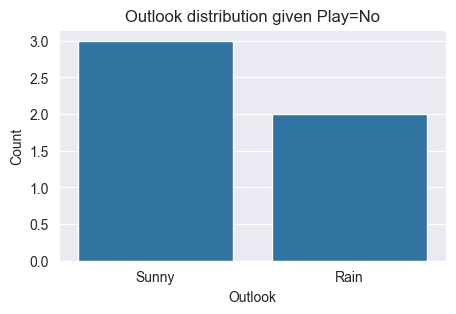

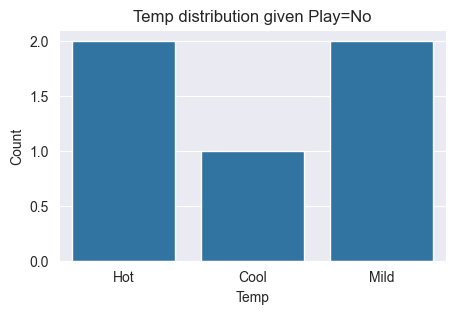

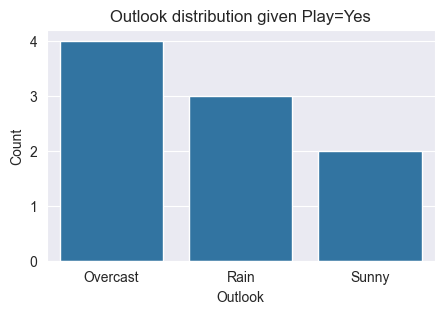

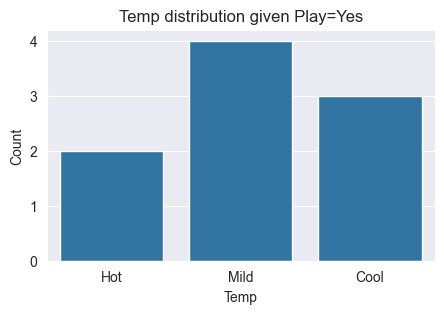

Test Sample: ['Sunny', 'Cool']
Prediction Probabilities: {'No': 0.05102040816326531, 'Yes': 0.053571428571428575}
Predicted Class: Yes


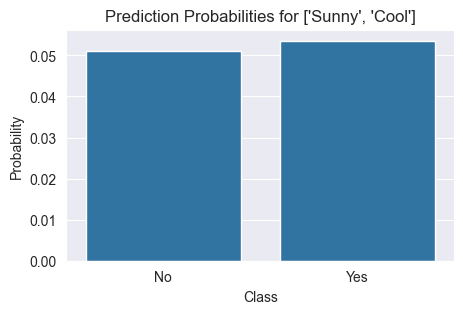

In [9]:
def plot_feature_distributions(feature_counts):
    for label in feature_counts:
        for feature in feature_counts[label]:
            plt.figure(figsize=(5, 3))
            sns.barplot(
                x=list(feature_counts[label][feature].keys()),
                y=list(feature_counts[label][feature].values())
            )
            plt.title(f"{feature} distribution given Play={label}")
            plt.xlabel(feature)
            plt.ylabel("Count")
            plt.show()


def plot_prediction_probs(probs, test_sample):
    plt.figure(figsize=(5, 3))
    sns.barplot(x=list(probs.keys()), y=list(probs.values()))
    plt.title(f"Prediction Probabilities for {test_sample}")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.show()


label_counts, feature_counts = train_naive_bayes(dataset)

# Plot training distributions
plot_feature_distributions(feature_counts)

# Test prediction
test_sample = ['Sunny', 'Cool']
probs = predict_naive_bayes(test_sample, label_counts, feature_counts)
prediction = max(probs, key=probs.get)

print("Test Sample:", test_sample)
print("Prediction Probabilities:", probs)
print("Predicted Class:", prediction)

# Visualize prediction
plot_prediction_probs(probs, test_sample)
